In [30]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import scipy as sp
import seaborn as sns

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML

In [31]:
rcParams['figure.figsize']= 5,4
sns.set_style('whitegrid')

## Linear Regression

In [32]:
#assumptions of linear regression
# all variables are continuous and not categorical
# data is free of missing values
# there is a linear relationship between predictors and predictants
# all predictors of independent of each other
# residuals/predictor errors are normally distributed

address = 'C:/Users/mailm_000/Desktop/Python Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch08/08_01/enrollment_forecast.csv'
enroll = pd.read_csv(address)
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


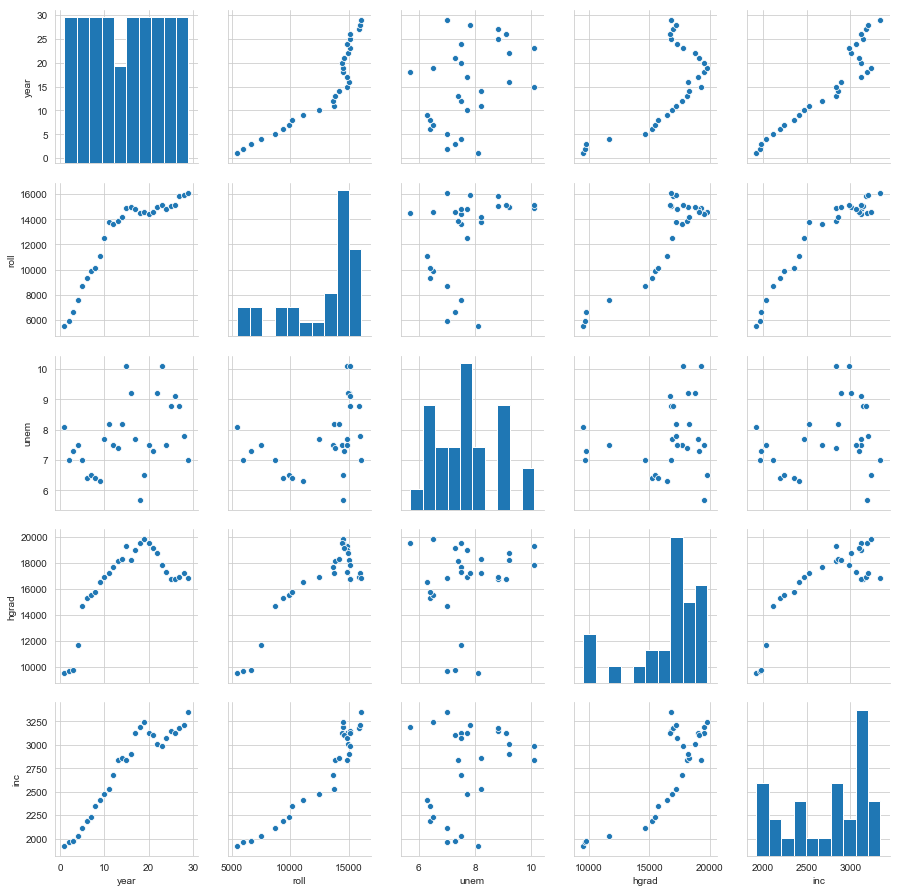

In [33]:
#look at data to validate linear regression assumptions
sns.pairplot(enroll)

### Look at correlations

In [34]:
enroll.corr()

,year,roll,unem,hgrad,inc
year,1.000000,0.900934,0.378305,0.670300,0.944287
roll,0.900934,1.000000,0.391344,0.890294,0.949876
unem,0.378305,0.391344,1.000000,0.177376,0.282310
hgrad,0.670300,0.890294,0.177376,1.000000,0.820089
inc,0.944287,0.949876,0.282310,0.820089,1.000000


### Selecting Predictors and Target Variables

In [35]:
# Now decided which variables to use and predictors (hgrad and unem)
# decided which variable to predict (roll)

enroll_data=enroll[['unem','hgrad']]
enroll_target= enroll['roll']

x,y = scale(enroll_data),enroll_target

### Find Missing Values

In [36]:
# find missing values using numpy
missing_values = x==np.NAN
x[missing_values]==True

array([], dtype=bool)

In [37]:
# find missing values using pandas
mis=pd.isnull(x)
x[mis]==True

array([], dtype=bool)

### Perform Linear Regression

In [38]:
LinReg= LinearRegression(normalize=True)
LinReg.fit(x,y)
print(LinReg.score(x,y))

0.8488812666133723


In [39]:
x_results  = LinReg.predict(x)
enroll['LinReg']=pd.DataFrame(x_results)
enroll

,year,roll,unem,hgrad,inc,LinReg
0,1,5501,8.1,9552,1923,6400.849323
1,2,5945,7.0,9680,1961,5753.365815
2,3,6629,7.3,9731,1979,6010.902374
3,4,7556,7.5,11666,2030,7973.861714
4,5,8716,7.0,14675,2112,10460.038704
5,6,9369,6.4,15265,2192,10597.021169
6,7,9920,6.5,15484,2235,10873.206614
7,8,10167,6.4,15723,2351,11028.583969
8,9,11084,6.3,16501,2411,11691.848548
9,10,12504,7.7,16890,2475,13035.969629


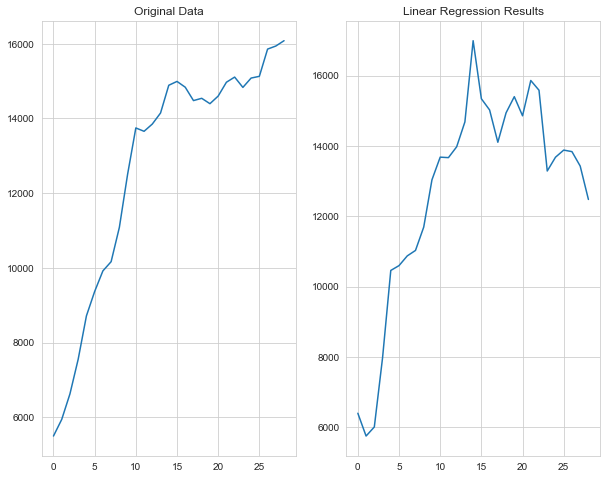

In [40]:
f,ax = plt.subplots(1,2, figsize=(10,8))

enroll.roll.plot(kind='line',ax=ax[0])
ax[0].set_title('Original Data')

ax[1].set_title('Linear Regression Results')
enroll.LinReg.plot(kind='line',ax=ax[1])

## Logistic Regression

In [41]:
# assumptions
# no missing data
# target variable is binary or ordinal (a categorial variable with ordered values)
# all predictors are independent of each other
# There are at least 50 observations

In [42]:
url = 'C:/Users/mailm_000/Desktop/Python Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch02/02_03/mtcars.csv'

cars= pd.read_csv(url)

cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()


,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [43]:
cars_data =cars[['drat','carb']]
y=cars['am']

#### checking for independence of features

C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


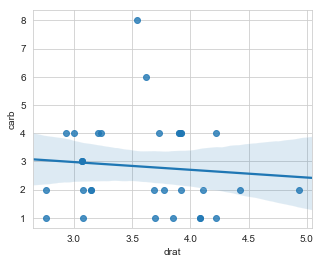

In [44]:
# are the predictor variables ordinal
sns.regplot(x='drat',y='carb',data=cars, scatter=True)

#### Checking for independence of predictor variables

In [45]:
drat=cars['drat']
carb=cars['carb']

spearmanr_coefficient,p_value = spearmanr(drat,carb)
print ( 'SpearmanR Correlation Coefficient %0.3f'  % spearmanr_coefficient)

SpearmanR Correlation Coefficient -0.125


#### Checking for missing values

In [46]:
cars.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

#### check that target variable is binary or ordinal

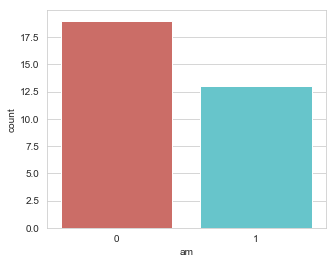

In [47]:
sns.countplot(x='am',data=cars,palette='hls')

#### Check size of dataset (50 observation per predictor, thus two predictors = 100 observations)

In [48]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_names    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [49]:
x=scale(cars_data)
y=cars['am']
LogReg=LogisticRegression()
LogReg.fit(x,y)
print (LogReg.score(x,y))

0.8125


In [50]:
y_pred = LogReg.predict(x)
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32



In [51]:
cars['LogReg']=pd.DataFrame(y_pred)
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,LogReg
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0


## Naive Bayes Classification

In [52]:
### 3 types of naive bayes classification
#1. multinomial -good when your features (categorical or continuous) describe frequency counts (ex word counts)
#2. Bernoulli - good for making predictions on binary features
#3. Gaussian - good for making predictions on normally distributed features

#Use case
#spam detection
#customer classification
#credit risk classification
#health risk classification

#assumptions
# features are independent
# a priori assumption - past conditions hold to be true for present circumstances (all regression models have this assumption)

In [53]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
raw_data=urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data,delimiter=",")
pd.DataFrame(dataset).head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


In [54]:
x= dataset[:,0:48]
y=dataset[:,-1]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33, random_state=17)

In [56]:
BernNB=BernoulliNB(binarize=True) #using bining to convert frequency counts to binary values
BernNB.fit(x_train,y_train)
print(BernNB)

y_expect=y_test
y_pred=BernNB.predict(x_test)
print(accuracy_score(y_expect,y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8558262014483212


In [57]:
MultiNB=MultinomialNB()
MultiNB.fit(x_train,y_train)
print(MultiNB)

y_expect=y_test
y_pred=MultiNB.predict(x_test)
print(accuracy_score(y_expect,y_pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8736010533245556


In [58]:
GausNB=GaussianNB()
GausNB.fit(x_train,y_train)
print(GausNB)


y_expect=y_test
y_pred=GausNB.predict(x_test)
print(accuracy_score(y_expect,y_pred))



GaussianNB(priors=None)
0.8130348913759052


In [59]:
BernNB=BernoulliNB(binarize=0.1) #using bining to convert frequency counts to binary values
BernNB.fit(x_train,y_train)
print(BernNB)

y_expect=y_test
y_pred=BernNB.predict(x_test)
print(accuracy_score(y_expect,y_pred))

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.8953258722843976
